In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import datetime

In [3]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\other_fx\inputs

2021/04/18  16:23    <DIR>          .
2021/04/18  16:23    <DIR>          ..
2021/04/18  16:22         2,573,622 EURGBP_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,576,106 EURJPY_M10_202003020000_202104162350.csv
2021/04/18  16:21         2,571,608 EURUSD_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,585,572 GBPJPY_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,578,380 GBPUSD_M10_202003020000_202104162350.csv
2021/04/18  15:32    <DIR>          m1
2021/04/18  16:23    <DIR>          m5
2021/04/18  16:22         2,571,975 USDJPY_M10_202003020000_202104162350.csv
               6 File(s)     15,457,263 bytes
               4 Dir(s)  466,181,447,680 bytes free


In [4]:
import pathlib

# y = {}
all_datasets = []

p_temp = pathlib.Path('inputs').glob('*.csv')
for p in p_temp:
    dataset = pd.DataFrame()
    
    curr = p.name.split('_')[0]
    tmp = pd.read_csv('inputs/' + p.name, sep='\t')
    dataset['<DATETIME>'] = tmp['<DATE>'] + ' ' + tmp['<TIME>']
#     y[curr] = tmp['<CLOSE>']
    dataset['<CLOSE>'] = tmp['<CLOSE>']
    
    for i in range(1, 13):
        dataset['shift%s'%i] = tmp['<CLOSE>'].shift(i)
    
#     dataset.drop(['<SPREAD>'], axis=1, inplace=True)
#     datasets[curr] = dataset

    # Calculate Simple Moving Average
#     dataset['<20SMA>'] = dataset['shift1'].rolling(20).mean().fillna(0)
#     dataset['<50SMA>'] = dataset['shift1'].rolling(50).mean().fillna(0)
#     dataset['<100SMA>'] = dataset['shift1'].rolling(100).mean().fillna(0)
    
    # Calculate diff of 5min ago
    dataset['<5DIFF>'] = abs(dataset['shift1'] - dataset['shift1'].shift(5).fillna(0))
#     dataset['<5DIFF>'] = dataset['<CLOSE>'].shift(5).fillna(0)
    
    if len(all_datasets) == 0:
        all_datasets = dataset
    else:
#         all_datasets = pd.merge(all_datasets, datasets[curr], on='<DATETIME>', suffixes=['', '_' + curr], how='outer')
#         dataset.drop(['<DATE>', '<TIME>'], axis=1, inplace=True)
        all_datasets = pd.merge(all_datasets, dataset, on='<DATETIME>', suffixes=['', '_' + curr])
    
print(all_datasets)

                <DATETIME>  <CLOSE>   shift1   shift2   shift3   shift4  \
0      2020.03.02 00:00:00  0.86243      NaN      NaN      NaN      NaN   
1      2020.03.02 00:10:00  0.86194  0.86243      NaN      NaN      NaN   
2      2020.03.02 00:20:00  0.86105  0.86194  0.86243      NaN      NaN   
3      2020.03.02 00:30:00  0.86274  0.86105  0.86194  0.86243      NaN   
4      2020.03.02 00:40:00  0.86213  0.86274  0.86105  0.86194  0.86243   
...                    ...      ...      ...      ...      ...      ...   
42121  2021.04.16 23:10:00  0.86575  0.86570  0.86575  0.86593  0.86597   
42122  2021.04.16 23:20:00  0.86569  0.86575  0.86570  0.86575  0.86593   
42123  2021.04.16 23:30:00  0.86569  0.86569  0.86575  0.86570  0.86575   
42124  2021.04.16 23:40:00  0.86569  0.86569  0.86569  0.86575  0.86570   
42125  2021.04.16 23:50:00  0.86556  0.86569  0.86569  0.86569  0.86575   

        shift5   shift6   shift7   shift8  ...  shift4_USDJPY  shift5_USDJPY  \
0          NaN     

In [5]:
all_datasets.columns.tolist()

['<DATETIME>',
 '<CLOSE>',
 'shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 '<5DIFF>',
 '<CLOSE>_EURJPY',
 'shift1_EURJPY',
 'shift2_EURJPY',
 'shift3_EURJPY',
 'shift4_EURJPY',
 'shift5_EURJPY',
 'shift6_EURJPY',
 'shift7_EURJPY',
 'shift8_EURJPY',
 'shift9_EURJPY',
 'shift10_EURJPY',
 'shift11_EURJPY',
 'shift12_EURJPY',
 '<5DIFF>_EURJPY',
 '<CLOSE>_EURUSD',
 'shift1_EURUSD',
 'shift2_EURUSD',
 'shift3_EURUSD',
 'shift4_EURUSD',
 'shift5_EURUSD',
 'shift6_EURUSD',
 'shift7_EURUSD',
 'shift8_EURUSD',
 'shift9_EURUSD',
 'shift10_EURUSD',
 'shift11_EURUSD',
 'shift12_EURUSD',
 '<5DIFF>_EURUSD',
 '<CLOSE>_GBPJPY',
 'shift1_GBPJPY',
 'shift2_GBPJPY',
 'shift3_GBPJPY',
 'shift4_GBPJPY',
 'shift5_GBPJPY',
 'shift6_GBPJPY',
 'shift7_GBPJPY',
 'shift8_GBPJPY',
 'shift9_GBPJPY',
 'shift10_GBPJPY',
 'shift11_GBPJPY',
 'shift12_GBPJPY',
 '<5DIFF>_GBPJPY',
 '<CLOSE>_GBPUSD',
 'shift1_GBPUSD',
 'shift2_GBPUSD',


In [6]:
all_datasets

,<DATETIME>,<CLOSE>,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,...,shift4_USDJPY,shift5_USDJPY,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<5DIFF>_USDJPY
0,2020.03.02 00:00:00,0.86243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.03.02 00:10:00,0.86194,0.86243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.664
2,2020.03.02 00:20:00,0.86105,0.86194,0.86243,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.704
3,2020.03.02 00:30:00,0.86274,0.86105,0.86194,0.86243,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.717
4,2020.03.02 00:40:00,0.86213,0.86274,0.86105,0.86194,0.86243,NaN,NaN,NaN,NaN,...,107.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42121,2021.04.16 23:10:00,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,0.86602,0.86581,...,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.787,108.788,0.004
42122,2021.04.16 23:20:00,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,0.86602,...,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.787,0.002
42123,2021.04.16 23:30:00,0.86569,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,...,108.793,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.778,0.004
42124,2021.04.16 23:40:00,0.86569,0.86569,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,...,108.787,108.793,108.788,108.793,108.782,108.783,108.770,108.793,108.764,0.008


In [7]:
all_datasets.describe()

,<CLOSE>,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,shift9,...,shift4_USDJPY,shift5_USDJPY,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<5DIFF>_USDJPY
count,42126.000000,42125.000000,42124.000000,42123.000000,42122.000000,42121.000000,42120.000000,42119.000000,42118.000000,42117.000000,...,42122.000000,42121.000000,42120.000000,42119.000000,42118.000000,42117.000000,42116.000000,42115.000000,42114.000000,42125.000000
mean,0.891274,0.891274,0.891275,0.891275,0.891276,0.891277,0.891277,0.891278,0.891278,0.891279,...,106.307266,106.307207,106.307148,106.307089,106.307030,106.306971,106.306912,106.306853,106.306795,0.071802
std,0.018065,0.018064,0.018064,0.018064,0.018064,0.018064,0.018063,0.018063,0.018063,0.018063,...,1.885867,1.885851,1.885835,1.885818,1.885802,1.885785,1.885769,1.885753,1.885737,1.174958
min,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,0.847220,...,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,101.355000,0.000000
25%,0.876390,0.876390,0.876390,0.876390,0.876390,0.876390,0.876390,0.876395,0.876400,0.876400,...,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,104.772000,0.016000
50%,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,0.895480,...,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,106.137000,0.038000
75%,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,0.904510,...,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,107.556000,0.074000
max,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,0.948760,...,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,111.667000,107.717000


In [8]:
all_datasets.isnull().any()

<DATETIME>        False
<CLOSE>           False
shift1             True
shift2             True
shift3             True
                  ...  
shift9_USDJPY      True
shift10_USDJPY     True
shift11_USDJPY     True
shift12_USDJPY     True
<5DIFF>_USDJPY     True
Length: 85, dtype: bool

In [9]:
all_datasets2 = all_datasets.iloc[100:]
all_datasets2

,<DATETIME>,<CLOSE>,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,...,shift4_USDJPY,shift5_USDJPY,shift6_USDJPY,shift7_USDJPY,shift8_USDJPY,shift9_USDJPY,shift10_USDJPY,shift11_USDJPY,shift12_USDJPY,<5DIFF>_USDJPY
100,2020.03.02 16:40:00,0.87067,0.87151,0.87141,0.87080,0.87023,0.87066,0.87161,0.87222,0.87104,...,107.721,107.681,107.621,107.607,107.674,107.709,107.771,107.790,107.739,0.012
101,2020.03.02 16:50:00,0.87081,0.87067,0.87151,0.87141,0.87080,0.87023,0.87066,0.87161,0.87222,...,107.770,107.721,107.681,107.621,107.607,107.674,107.709,107.771,107.790,0.087
102,2020.03.02 17:00:00,0.87209,0.87081,0.87067,0.87151,0.87141,0.87080,0.87023,0.87066,0.87161,...,107.789,107.770,107.721,107.681,107.621,107.607,107.674,107.709,107.771,0.161
103,2020.03.02 17:10:00,0.87129,0.87209,0.87081,0.87067,0.87151,0.87141,0.87080,0.87023,0.87066,...,107.633,107.789,107.770,107.721,107.681,107.621,107.607,107.674,107.709,0.351
104,2020.03.02 17:20:00,0.87093,0.87129,0.87209,0.87081,0.87067,0.87151,0.87141,0.87080,0.87023,...,107.594,107.633,107.789,107.770,107.721,107.681,107.621,107.607,107.674,0.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42121,2021.04.16 23:10:00,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,0.86602,0.86581,...,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.787,108.788,0.004
42122,2021.04.16 23:20:00,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,0.86602,...,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.778,108.787,0.002
42123,2021.04.16 23:30:00,0.86569,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,0.86600,...,108.793,108.788,108.793,108.782,108.783,108.770,108.793,108.764,108.778,0.004
42124,2021.04.16 23:40:00,0.86569,0.86569,0.86569,0.86575,0.86570,0.86575,0.86593,0.86597,0.86613,...,108.787,108.793,108.788,108.793,108.782,108.783,108.770,108.793,108.764,0.008


In [10]:
all_datasets2.isnull().sum()

<DATETIME>        0
<CLOSE>           0
shift1            0
shift2            0
shift3            0
                 ..
shift9_USDJPY     0
shift10_USDJPY    0
shift11_USDJPY    0
shift12_USDJPY    0
<5DIFF>_USDJPY    0
Length: 85, dtype: int64

# Make Predict model by LightGBM

In [11]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [12]:
y = all_datasets2['<CLOSE>']
X = all_datasets2.drop(['<DATETIME>', '<CLOSE>', '<CLOSE>_EURJPY', '<CLOSE>_EURUSD', '<CLOSE>_GBPJPY', '<CLOSE>_GBPUSD', '<CLOSE>_USDJPY'], axis=1)

In [13]:
X.shape

(42026, 78)

In [14]:
y.shape

(42026,)

In [15]:
X.columns.tolist()

['shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 '<5DIFF>',
 'shift1_EURJPY',
 'shift2_EURJPY',
 'shift3_EURJPY',
 'shift4_EURJPY',
 'shift5_EURJPY',
 'shift6_EURJPY',
 'shift7_EURJPY',
 'shift8_EURJPY',
 'shift9_EURJPY',
 'shift10_EURJPY',
 'shift11_EURJPY',
 'shift12_EURJPY',
 '<5DIFF>_EURJPY',
 'shift1_EURUSD',
 'shift2_EURUSD',
 'shift3_EURUSD',
 'shift4_EURUSD',
 'shift5_EURUSD',
 'shift6_EURUSD',
 'shift7_EURUSD',
 'shift8_EURUSD',
 'shift9_EURUSD',
 'shift10_EURUSD',
 'shift11_EURUSD',
 'shift12_EURUSD',
 '<5DIFF>_EURUSD',
 'shift1_GBPJPY',
 'shift2_GBPJPY',
 'shift3_GBPJPY',
 'shift4_GBPJPY',
 'shift5_GBPJPY',
 'shift6_GBPJPY',
 'shift7_GBPJPY',
 'shift8_GBPJPY',
 'shift9_GBPJPY',
 'shift10_GBPJPY',
 'shift11_GBPJPY',
 'shift12_GBPJPY',
 '<5DIFF>_GBPJPY',
 'shift1_GBPUSD',
 'shift2_GBPUSD',
 'shift3_GBPUSD',
 'shift4_GBPUSD',
 'shift5_GBPUSD',
 'shift6_GBPUSD',
 'shift7_GBPUSD',
 'shift8_GBPU

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [17]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [18]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'mse'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.01,
        'seed':0,
        'verbose':0,
        'device': 'cpu'
}

In [19]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029133 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 1000 rounds
[100]	Train's l2: 2.7431e-05	Valid's l2: 9.53409e-06
[200]	Train's l2: 3.85943e-06	Valid's l2: 1.46356e-06
[300]	Train's l2: 6.83906e-07	Valid's l2: 3.56793e-07
[400]	Train's l2: 2.4464e-07	Valid's l2: 2.12487e-07
[500]	Train's l2: 1.74368e-07	Valid's l2: 1.91986e-07
[600]	Train's l2: 1.55916e-07	Valid's l2: 1.89526e-07
[700]	Train's l2: 1.46104e-07	Valid's l2: 1.9067e-07
[800]	Train's l2: 1.38206e-07	Valid's l2: 1.91026e-07
[900]	Train's l2: 1.3079e-07	Valid's l2: 1.91551e-07
[1000]	Train's l2: 1.24911e-07	Valid's l2: 1.9225e-07
[1100]	Train's l2: 1.19618e-07	Valid's l2: 1.93794e-07
[1200]	Train's l2: 1.14691e-07	Valid's l2: 1.95068e-07
[1300]	Train's l2: 1.10184e-07	Valid's l2: 1.95262e-07
[1400]	Train's l2: 1.0606e-07	Valid's l2: 1.95702e-07
[1500]	Train's l2

In [20]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [21]:
y_pred

array([0.88815885, 0.88816018, 0.88813282, ..., 0.86603652, 0.8660375 ,
       0.86604536])

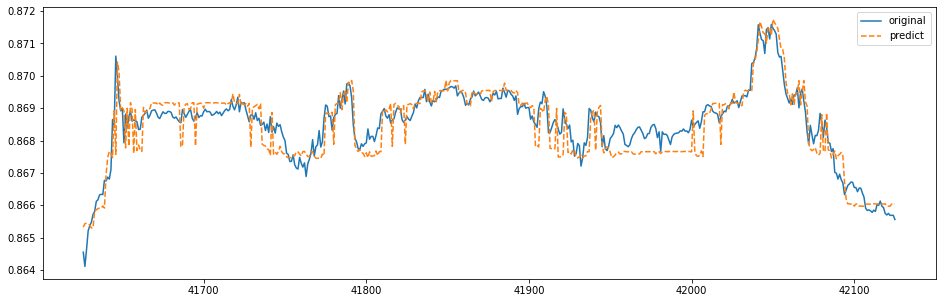

In [22]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y[-500:], label='original')
plt.plot(y_[-500:], '--', label='predict')
plt.legend()